In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df=pd.read_csv('SpamEmail.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print('dataset: ')
print(df.head(), '\n')
print('Null values in the dataset: ')
print(df.isnull(), '\n')
print(df.isnull().sum(), '\n')
df["Category"]=[1 if each == "spam" else 0 for each in df["Category"]]
print('dataset: ')
print(df.head(), '\n')

dataset: 
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro... 

Null values in the dataset: 
      Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns] 

Category    0
Message     0
dtype: int64 

dataset: 
   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a

In [6]:
X=df.iloc[:,1].values
X=X.reshape(-1,1)
print('Type of X:', type(X))
print('Shape of X:', X.shape)

Type of X: <class 'numpy.ndarray'>
Shape of X: (5572, 1)


In [7]:
Y=df.iloc[:, 0].values
y=Y.reshape(-1,1)
print('Type of Y: ',type(Y))
print('Shape of Y: ',y.shape)

Type of Y:  <class 'numpy.ndarray'>
Shape of Y:  (5572, 1)


In [8]:
X=X.tolist()
y=y.tolist()
print('Length of x:',len(X), '\n')

Length of x: 5572 



In [9]:
X_train = X[1000:]
y_train = y[1000:]
print('Length of training samples ', len(X_train), '\n')

X_test = X[0: 1000]
y_test = y[0:1000]
print('Length of testing samples', len(X_test), '\n')

Length of training samples  4572 

Length of testing samples 1000 



In [10]:
tokenizer = Tokenizer(num_words=30000, oov_token='<UNK>')
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [11]:
Training_Sequences = tokenizer.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_Sequences, maxlen=32, padding='post', truncating='post')

Testing_Sequences = tokenizer.texts_to_sequences(X_test)
Testing_pad = pad_sequences(Testing_Sequences, maxlen=32, padding='post', truncating='post')

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(30000, 16, input_length=32))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


C:\Users\Ds_Lab_19\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
Training_Sequences_padded = np.asarray(Training_pad)
Testing_Sequences_padded = np.asarray(Testing_pad)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)


In [15]:
EPOCHS = 15
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(Training_Sequences_padded, y_train, validation_data=(Testing_Sequences_padded, y_test), epochs=15)

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8741 - loss: 0.4343 - val_accuracy: 0.8480 - val_loss: 0.4270
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8716 - loss: 0.3858 - val_accuracy: 0.8480 - val_loss: 0.4290
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8750 - loss: 0.3672 - val_accuracy: 0.8780 - val_loss: 0.5112
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9969 - loss: 0.0135 - val_accuracy: 0.2300 - val_loss: 1.3694
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 2.1475e-04 - val_accuracy: 0.2300 - val_loss: 2.7614
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 7.0432e-05 - val_accuracy: 0.2300 - val_loss: 1.9501
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 5.3886e-05 - val_accuracy: 0.2300 - val_loss: 3.4563
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 3.09

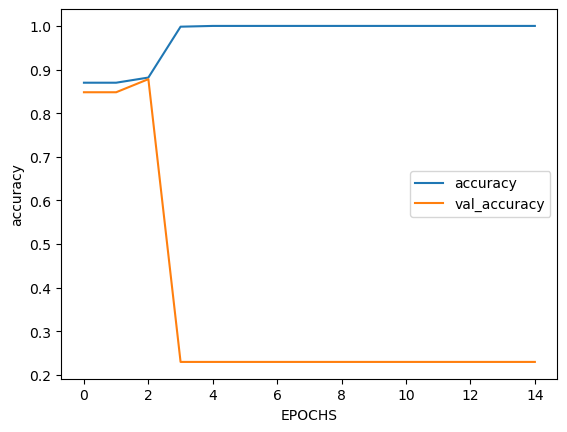

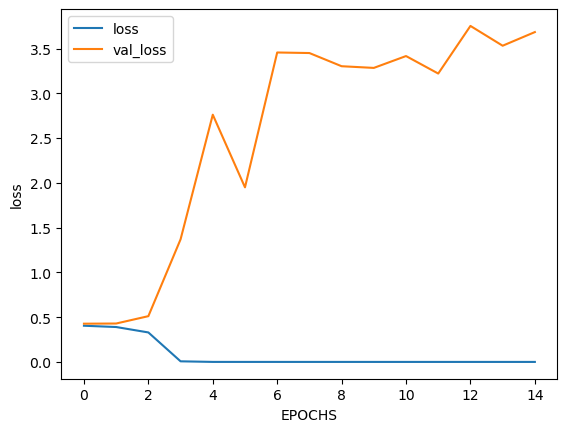

In [16]:
def Plot(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("EPOCHS")
    plt.ylabel(string)
    plt.legend([string,'val_' + string])
    plt.savefig(string+'.png')
    plt.show()
Plot(history,"accuracy")
Plot(history,"loss")

In [17]:
text='Upto 50% off on electronics, shop now'
print(text)
Test=tokenizer.texts_to_sequences([text])[0]
Test_padded=pad_sequences([Test],maxlen=32,padding='post',truncating='post')
Test_padded=np.asarray(Test_padded)
print('Done')
print(Test_padded.shape)
ypred=model.predict(Test_padded)
if ypred[0][0]>0.5:
    print('spam')
else:
    print('Not spam')
print('output class:',ypred)

Upto 50% off on electronics, shop now
Done
(1, 32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
spam
output class: [[0.99996495]]


In [18]:
y_pred=model.predict(Testing_Sequences_padded)
classes_x=np.argmax(y_pred,axis=1)
print(y_pred.shape)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
(1000, 1)


In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model is",(accuracy_score(y_test, classes_x)*100), "%")

Accuracy of the model is 84.8 %
